In [1]:
# Setting the working directory
import os
os.chdir('/Users/ssg/Desktop/Python/Data')

In [2]:
# Suppress Warning message
import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
import sys
sys.path = ['/Users/ssg/Desktop/Python/packge'] + sys.path

In [4]:
# Importing relevant libraries
import scorecardpy as sc
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
from sklearn import preprocessing
from sklearn import  linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

/Users/ssg/Desktop/Python/packge/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [5]:
# Reading the dataset
df_bs = pd.read_csv('/Users/ssg/Desktop/hour.csv')

In [6]:
# Printing First few records
df_bs.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
# Shape of the Dataset
df_bs.shape

(17379, 17)

In [8]:
# Renaming the Data

df_bs.rename(columns={'instant':'id',
                        'dteday':'datetime',
                        'holiday':'holiday_ind',
                        'workingday':'workingday_ind',
                        'weathersit':'weather_con',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

In [9]:
df_bs.head()

,id,datetime,season,year,month,hour,holiday_ind,weekday,workingday_ind,weather_con,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
df_bs.dtypes

id                  int64
datetime           object
season              int64
year                int64
month               int64
hour                int64
holiday_ind         int64
weekday             int64
workingday_ind      int64
weather_con         int64
temp              float64
atemp             float64
humidity          float64
windspeed         float64
casual              int64
registered          int64
total_count         int64
dtype: object

In [11]:
df_bs.dtypes

id                  int64
datetime           object
season              int64
year                int64
month               int64
hour                int64
holiday_ind         int64
weekday             int64
workingday_ind      int64
weather_con         int64
temp              float64
atemp             float64
humidity          float64
windspeed         float64
casual              int64
registered          int64
total_count         int64
dtype: object

In [12]:
# Check for Missing observations
(df_bs.isnull().sum() / len(df_bs)).sort_values(ascending=False)

total_count       0.0
weekday           0.0
datetime          0.0
season            0.0
year              0.0
month             0.0
hour              0.0
holiday_ind       0.0
workingday_ind    0.0
registered        0.0
weather_con       0.0
temp              0.0
atemp             0.0
humidity          0.0
windspeed         0.0
casual            0.0
id                0.0
dtype: float64

mu = 189.46 and sigma = 181.38


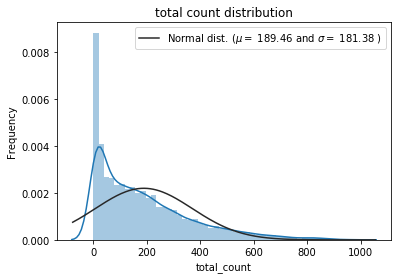

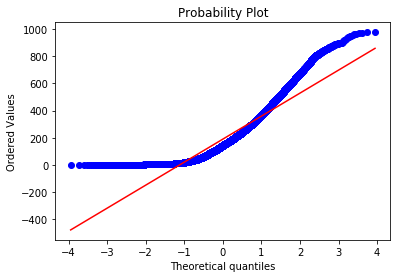

In [13]:
# Test - Distribution of Dep Var
from scipy import stats
from scipy.stats import norm, skew
sns.distplot(df_bs['total_count'] , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_bs['total_count'])
print( 'mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('total count distribution')
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_bs['total_count'], plot=plt)
plt.show()

Text(0, 0.5, 'Freq')

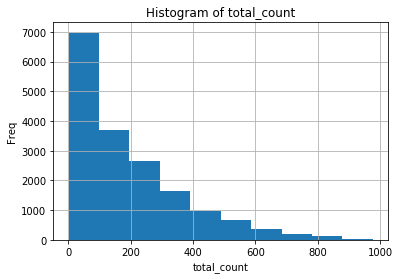

In [14]:
# An alternative View
df_bs.total_count.hist()
plt.title('Histogram of total_count')
plt.xlabel('total_count')
plt.ylabel('Freq')

mu = 4.57 and sigma = 1.42


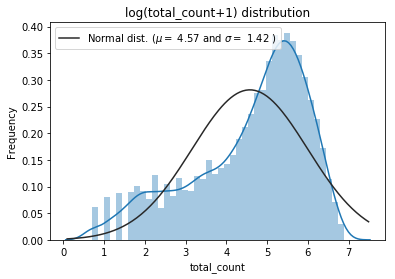

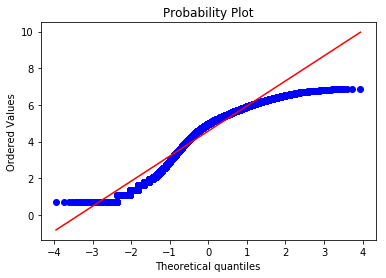

In [15]:
# Log-transformation of the Dep Variable
sns.distplot(np.log1p(df_bs['total_count']) , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(np.log1p(df_bs['total_count']))
print( 'mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('log(total_count+1) distribution')
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(np.log1p(df_bs['total_count']), plot=plt)
plt.show()

In [16]:
df_bs.describe()

,id,season,year,month,hour,holiday_ind,weekday,workingday_ind,weather_con,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


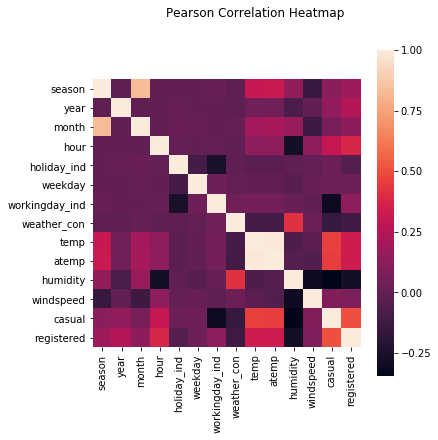

In [17]:
# Check for correlation with the Numeric features
df_bs_nid = df_bs.drop(['id'],axis=1)
pd.set_option('precision',2)
plt.figure(figsize=(6, 6))
sns.heatmap(df_bs_nid.drop(['total_count'],axis=1).corr(), square=True)
plt.suptitle("Pearson Correlation Heatmap")
plt.show()

/Users/ssg/Desktop/Python/packge/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


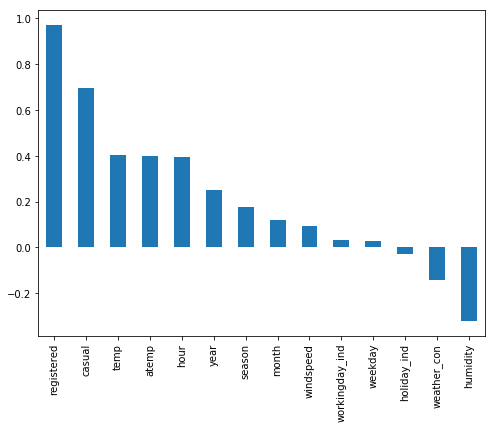

In [18]:
corr_with_tot_count = df_bs_nid.corr()["total_count"].sort_values(ascending=False)
plt.figure(figsize=(8,6))
corr_with_tot_count.drop("total_count").plot.bar()
plt.show()

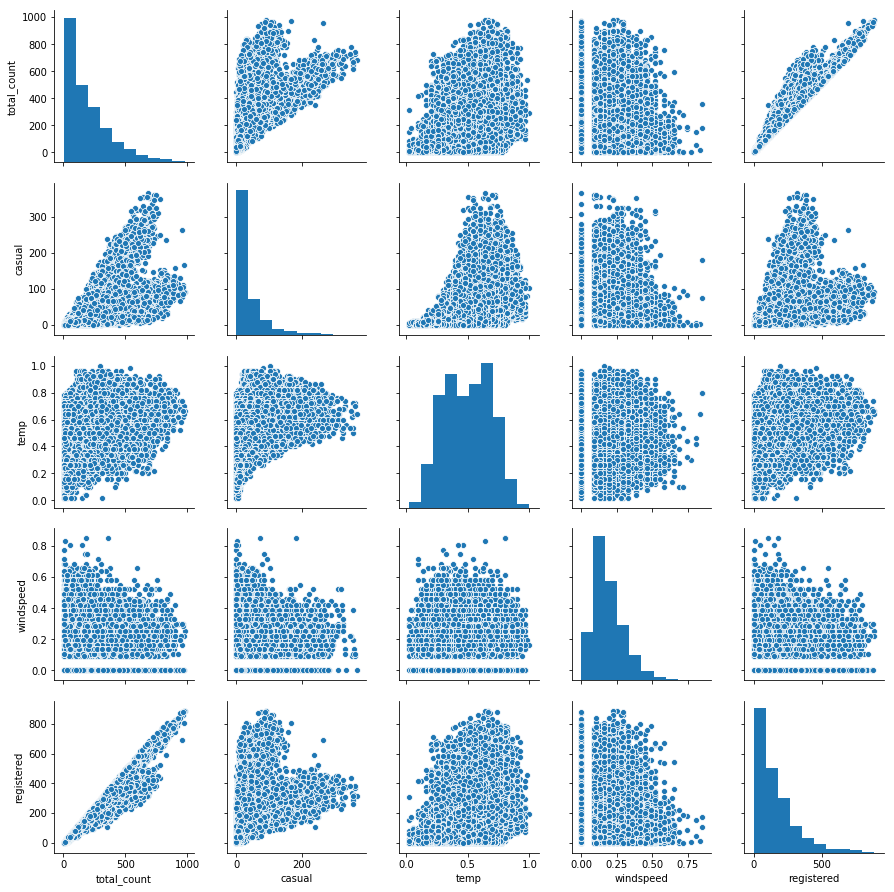

In [19]:
sns.pairplot(df_bs_nid[['total_count', 'casual', 'temp', 'windspeed','registered']])
plt.show()

In [20]:
# Converting the categorical variables using dummy variable encoding
d_season = pd.get_dummies(df_bs['season'], prefix='season')
d_hol_i = pd.get_dummies(df_bs['holiday_ind'], prefix='hol')
d_wkd = pd.get_dummies(df_bs['weekday'], prefix='weekday')
d_w_con = pd.get_dummies(df_bs['weather_con'], prefix='w_con')
d_wd_i = pd.get_dummies(df_bs['workingday_ind'], prefix='wd_i')
d_mon = pd.get_dummies(df_bs['month'], prefix='mon') 
d_yr = pd.get_dummies(df_bs['year'], prefix='yr')
d_hr = pd.get_dummies(df_bs['hour'], prefix='hour')

In [21]:
# Create the final dataset with all the relevant features - both dependant and predictors
feature_x_cont = ['temp','atemp','humidity','windspeed','casual','registered']
df_bs_cont = df_bs[feature_x_cont]

# Creating the Final data with all the relevant fields and Dep Variable
df_bs_new = pd.concat([d_season,d_hol_i,d_wkd,d_w_con,
                       d_wd_i,d_mon,d_yr,d_hr,
                       df_bs_cont,df_bs['total_count']],axis=1)

In [22]:
df_bs_new.shape

(17379, 64)

In [23]:
df_bs_new.head()

,season_1,season_2,season_3,season_4,hol_0,hol_1,weekday_0,weekday_1,weekday_2,weekday_3,...,hour_21,hour_22,hour_23,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0.24,0.29,0.81,0.0,3,13,16
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0.22,0.27,0.80,0.0,8,32,40
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0.22,0.27,0.80,0.0,5,27,32
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0.24,0.29,0.75,0.0,3,10,13
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0.24,0.29,0.75,0.0,0,1,1


# Discover outliers - if Any

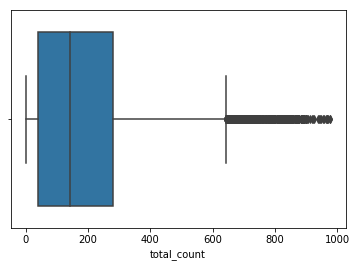

In [24]:
# Box-Plot
import seaborn as sns
sns.boxplot(x=df_bs['total_count'])

In [25]:
df_bs_new.describe()

,season_1,season_2,season_3,season_4,hol_0,hol_1,weekday_0,weekday_1,weekday_2,weekday_3,...,hour_21,hour_22,hour_23,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,...,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
mean,0.24,0.25,0.26,0.24,0.97,0.03,0.14,0.14,0.14,0.14,...,0.04,0.04,0.04,0.50,0.48,0.63,0.19,35.68,153.79,189.46
std,0.43,0.44,0.44,0.43,0.17,0.17,0.35,0.35,0.35,0.35,...,0.20,0.20,0.20,0.19,0.17,0.19,0.12,49.31,151.36,181.39
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,1.00
25%,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.34,0.33,0.48,0.10,4.00,34.00,40.00
50%,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.50,0.48,0.63,0.19,17.00,115.00,142.00
75%,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.66,0.62,0.78,0.25,48.00,220.00,281.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.85,367.00,886.00,977.00


In [26]:
df_bs_new.shape

(17379, 64)

# Feature Selection - Regularization

In [27]:
Y_bs_data = df_bs_new['total_count']
X_bs_data = df_bs_new.drop(['total_count'],axis=1)

In [28]:
print(Y_bs_data.shape)
print(X_bs_data.shape)

(17379,)
(17379, 63)


In [29]:
# Creating the Feature Space for Iris data
X_colnames_u = [cols for cols in df_bs_new.columns.tolist() if cols not in [
'total_count'
]]
X_colnames_u

['season_1',
 'season_2',
 'season_3',
 'season_4',
 'hol_0',
 'hol_1',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'w_con_1',
 'w_con_2',
 'w_con_3',
 'w_con_4',
 'wd_i_0',
 'wd_i_1',
 'mon_1',
 'mon_2',
 'mon_3',
 'mon_4',
 'mon_5',
 'mon_6',
 'mon_7',
 'mon_8',
 'mon_9',
 'mon_10',
 'mon_11',
 'mon_12',
 'yr_0',
 'yr_1',
 'hour_0',
 'hour_1',
 'hour_2',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered']

In [30]:
# Creating Training and Test data
x_train,x_test,y_train,y_test = train_test_split(X_bs_data,Y_bs_data,train_size = 0.7,random_state=3)

/Users/ssg/Desktop/Python/packge/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12165, 63)
(5214, 63)
(12165,)
(5214,)


In [33]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNetCV
cv_model = ElasticNetCV(l1_ratio=[.1,.2,.3,.4, .5, .7, .9, .95, .99, 1], eps=1e-3, n_alphas=100, 
                        fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=10, 
                        copy_X=True, verbose=0, positive=False, random_state=0)
               
cv_model.fit(x_train, y_train)
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 0.00160287
Optimal l1_ratio: 1.000
Number of iterations 18


In [34]:
import time
from datetime import datetime
def log_msg(message):
    print(str(datetime.now()) + ": " + message)

log_msg("Started running LR for feature selection...")
from sklearn.feature_selection import RFE,RFECV
from sklearn.linear_model import LinearRegression,ElasticNet,RandomizedLasso
# from sklearn.feature_selection import RFE
 
# lr1 = ElasticNet(alpha='0.00160287', l1_ratio=1.0)
lr1 = LinearRegression()
rfe = RFE(estimator=lr1, n_features_to_select=30, step=1)
rfe.fit(x_train, y_train)

log_msg("Completed running LR for feature selection...")

2019-03-25 09:06:50.913436: Started running LR for feature selection...
2019-03-25 09:06:51.378342: Completed running LR for feature selection...


In [35]:
select_features_rfe = rfe.get_support()
feature_names_rfe = x_train.columns[select_features_rfe]
print(feature_names_rfe)
set(feature_names_rfe)

Index(['season_3', 'season_4', 'weekday_0', 'weekday_2', 'w_con_4', 'wd_i_1',
       'mon_1', 'mon_2', 'mon_3', 'mon_4', 'mon_5', 'mon_6', 'mon_7', 'mon_8',
       'mon_10', 'mon_11', 'yr_1', 'hour_0', 'hour_1', 'hour_2', 'hour_13',
       'hour_17', 'hour_18', 'hour_19', 'hour_23', 'temp', 'humidity',
       'windspeed', 'casual', 'registered'],
      dtype='object')


{'casual',
 'hour_0',
 'hour_1',
 'hour_13',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_2',
 'hour_23',
 'humidity',
 'mon_1',
 'mon_10',
 'mon_11',
 'mon_2',
 'mon_3',
 'mon_4',
 'mon_5',
 'mon_6',
 'mon_7',
 'mon_8',
 'registered',
 'season_3',
 'season_4',
 'temp',
 'w_con_4',
 'wd_i_1',
 'weekday_0',
 'weekday_2',
 'windspeed',
 'yr_1'}

In [36]:
# Apply RandomisedLasso
lasso = RandomizedLasso(alpha=0.00160287)
lasso.fit(x_train, y_train)

/Users/ssg/Desktop/Python/packge/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ssg/Desktop/Python/packge/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Memory is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ssg/Desktop/Python/packge/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Parallel is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ssg/Desktop/Python/packge/sklearn/utils/deprecation.py:77: DeprecationWarning: Functi

/Users/ssg/Desktop/Python/packge/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ssg/Desktop/Python/packge/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ssg/Desktop/Python/packge/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Use

/Users/ssg/Desktop/Python/packge/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ssg/Desktop/Python/packge/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ssg/Desktop/Python/packge/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Use

/Users/ssg/Desktop/Python/packge/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ssg/Desktop/Python/packge/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ssg/Desktop/Python/packge/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Use

/Users/ssg/Desktop/Python/packge/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ssg/Desktop/Python/packge/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ssg/Desktop/Python/packge/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Use

/Users/ssg/Desktop/Python/packge/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ssg/Desktop/Python/packge/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ssg/Desktop/Python/packge/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Use

/Users/ssg/Desktop/Python/packge/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ssg/Desktop/Python/packge/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ssg/Desktop/Python/packge/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/Use

RandomizedLasso(alpha=0.00160287, eps=2.220446049250313e-16,
        fit_intercept=True, max_iter=500, memory=None, n_jobs=None,
        n_resampling=200, normalize=True, pre_dispatch='3*n_jobs',
        precompute='auto', random_state=None, sample_fraction=0.75,
        scaling=0.5, selection_threshold=0.25, verbose=False)

In [37]:
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), lasso.scores_), 
                  X_bs_data.columns), reverse=True))

Features sorted by their score:
[(1.0, 'registered'), (1.0, 'casual'), (0.1, 'temp'), (0.07, 'atemp'), (0.0, 'yr_1'), (0.0, 'yr_0'), (0.0, 'windspeed'), (0.0, 'weekday_6'), (0.0, 'weekday_5'), (0.0, 'weekday_4'), (0.0, 'weekday_3'), (0.0, 'weekday_2'), (0.0, 'weekday_1'), (0.0, 'weekday_0'), (0.0, 'wd_i_1'), (0.0, 'wd_i_0'), (0.0, 'w_con_4'), (0.0, 'w_con_3'), (0.0, 'w_con_2'), (0.0, 'w_con_1'), (0.0, 'season_4'), (0.0, 'season_3'), (0.0, 'season_2'), (0.0, 'season_1'), (0.0, 'mon_9'), (0.0, 'mon_8'), (0.0, 'mon_7'), (0.0, 'mon_6'), (0.0, 'mon_5'), (0.0, 'mon_4'), (0.0, 'mon_3'), (0.0, 'mon_2'), (0.0, 'mon_12'), (0.0, 'mon_11'), (0.0, 'mon_10'), (0.0, 'mon_1'), (0.0, 'humidity'), (0.0, 'hour_9'), (0.0, 'hour_8'), (0.0, 'hour_7'), (0.0, 'hour_6'), (0.0, 'hour_5'), (0.0, 'hour_4'), (0.0, 'hour_3'), (0.0, 'hour_23'), (0.0, 'hour_22'), (0.0, 'hour_21'), (0.0, 'hour_20'), (0.0, 'hour_2'), (0.0, 'hour_19'), (0.0, 'hour_18'), (0.0, 'hour_17'), (0.0, 'hour_16'), (0.0, 'hour_15'), (0.0, 'hour_1

In [38]:
# Final Features
cols=['casual',
 'hour_0',
 'hour_1',
 'hour_13',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_2',
 'hour_23',
 'humidity',
 'mon_1',
 'mon_10',
 'mon_11',
 'mon_2',
 'mon_3',
 'mon_4',
 'mon_5',
 'mon_6',
 'mon_7',
 'mon_8',
 'registered',
 'season_3',
 'season_4',
 'temp',
 'w_con_4',
 'wd_i_1',
 'weekday_0',
 'weekday_2',
 'windspeed',
 'yr_1'] 
x_new_f=df_bs_new[cols]
y_new_f=df_bs_new['total_count']

In [39]:
print(x_new_f.shape)
print(y_new_f.shape)

(17379, 30)
(17379,)


In [40]:
# Creating Training and Test data
x_train,x_test,y_train,y_test = train_test_split(x_new_f,y_new_f,train_size = 0.7,random_state=4)

/Users/ssg/Desktop/Python/packge/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [41]:
x_train.head()

,casual,hour_0,hour_1,hour_13,hour_17,hour_18,hour_19,hour_2,hour_23,humidity,...,registered,season_3,season_4,temp,w_con_4,wd_i_1,weekday_0,weekday_2,windspeed,yr_1
13590,79,0,0,0,0,0,0,0,0,0.33,...,202,1,0,0.76,0,1,0,0,0.00,1
1823,41,0,0,0,1,0,0,0,0,0.64,...,231,0,0,0.54,0,1,0,0,0.25,0
14404,44,0,0,0,0,0,0,0,0,0.79,...,351,1,0,0.70,0,1,0,1,0.16,1
9900,15,0,0,1,0,0,0,0,0,0.54,...,175,0,0,0.42,0,1,0,0,0.30,1
11014,2,0,0,0,0,0,0,1,0,0.31,...,4,0,0,0.46,0,1,0,0,0.19,1


In [42]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12165, 30)
(5214, 30)
(12165,)
(5214,)


In [43]:
# Dealing with Multi-collinearity
# Test for Multi-collinearity
# Calculation of VIF
import statsmodels.api as sm
print ("Variance Inflation Factor - VIF")
colnames = x_train.columns
for i in np.arange(0,len(colnames)):
    x_vars = list(colnames)
    y_var = x_vars.pop(i)
    model = sm.OLS(x_train[y_var],sm.add_constant(x_train[x_vars]))
    resid = model.fit()
    vif = 1/(1-resid.rsquared)
    print (y_var,round(vif,2))

Variance Inflation Factor - VIF
casual 2.33
hour_0 1.05
hour_1 1.07
hour_13 1.07
hour_17 1.21
hour_18 1.16
hour_19 1.07


/Users/ssg/Desktop/Python/packge/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


hour_2 1.08
hour_23 1.04
humidity 1.4
mon_1 2.82
mon_10 1.96
mon_11 1.9
mon_2 2.62
mon_3 2.7
mon_4 2.7
mon_5 3.05
mon_6 2.45
mon_7 2.28
mon_8 2.12
registered 2.25
season_3 5.66
season_4 6.66
temp 4.46
w_con_4 1.0
wd_i_1 2.01
weekday_0 1.57
weekday_2 1.08
windspeed 1.14
yr_1 1.13


In [44]:
# Create a remove var list based on the VIF values
remove_cols_extra_dummy = ['casual','temp','wd_i_1',
                           'mon_1','mon_2','season_3','registered',
                           'season_4','w_con_4','mon_3','weekday_2',
                           'mon_4','mon_5'
                          ]
remove_cols = list(set(remove_cols_extra_dummy))

In [45]:
# Calculation of VIF
print ("Variance Inflation Factor -VIF")
colnames = x_train.drop(remove_cols,axis=1).columns
for i in np.arange(0,len(colnames)):
    x_vars = list(colnames)
    y_var = x_vars.pop(i)
    model = sm.OLS(x_train.drop(remove_cols,axis=1)[y_var],sm.add_constant(x_train.drop(remove_cols,axis=1)[x_vars]))
    resid = model.fit()
    vif = 1/(1-resid.rsquared)
    print (y_var,round(vif,2))

Variance Inflation Factor -VIF
hour_0 1.02
hour_1 1.03
hour_13 1.03
hour_17 1.04
hour_18 1.03
hour_19 1.03
hour_2 1.03
hour_23 1.02
humidity 1.19
mon_10 1.06
mon_11 1.05
mon_6 1.06
mon_7 1.06
mon_8 1.05
weekday_0 1.0
windspeed 1.12
yr_1 1.01


In [46]:
x_train_new = x_train.drop(remove_cols,axis=1)
x_test_new = x_test.drop(remove_cols,axis=1)

In [47]:
import statsmodels.api as sm
lin_model = sm.OLS(y_train,sm.add_constant(x_train_new)).fit()
print (lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     511.2
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        09:07:15   Log-Likelihood:                -77228.
No. Observations:               12165   AIC:                         1.545e+05
Df Residuals:                   12147   BIC:                         1.546e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        230.3502      6.092     37.812      0.0

In [48]:
print(x_train_new.shape)
print(x_test_new.shape)

(12165, 17)
(5214, 17)


In [49]:
cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=1e-3, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0002, cv=10, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=0)
               
cv_model.fit(x_train_new, y_train)
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 0.00052248
Optimal l1_ratio: 1.000
Number of iterations 6


In [50]:
x_train_new.shape

(12165, 17)

In [51]:
# Using Sklearn package to model the data
from sklearn.linear_model import LinearRegression
from sklearn import metrics
linreg = LinearRegression()
linreg.fit(x_train_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
# Score From the Final Model
y_pred = linreg.predict(x_test_new)
r2_score = linreg.score(x_test_new,y_test)
print("R-squared:", (r2_score))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))

# Score from Cv Model
y_pred_cv = cv_model.predict(x_test_new)
r2_score = cv_model.score(x_test_new,y_test)
print("R-squared:",(r2_score))
print("MSE:", metrics.mean_squared_error(y_test, y_pred_cv))

R-squared: 0.4252419427750895
MSE: 19030.57292805706
R-squared: 0.4252554595963965
MSE: 19030.125378256922


In [53]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_train_pred = linreg.predict(x_train_new)
y_pred = linreg.predict(x_test_new)
train_mse = mean_squared_error(y_train_pred, y_train)
test_mse = mean_squared_error(y_pred, y_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

Train RMSE: 138.29673705268732
Test RMSE: 137.95134261056344


In [54]:
y_pred.shape

(5214,)

In [55]:
y_train_pred.shape

(12165,)

features, reduction of 0.00%


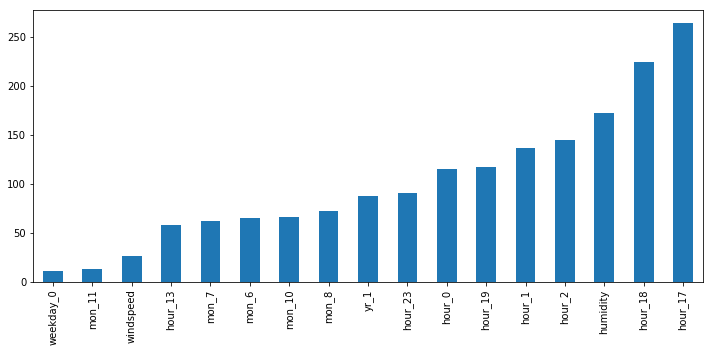

In [56]:
feature_importance = pd.Series(index = x_train_new.columns, data = np.abs(cv_model.coef_))
n_selected_features = (feature_importance>0).sum()
print('features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))
feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (12,5))

In [57]:
import shap
shap.initjs()

/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [65]:
explainer = shap.LinearExplainer(linreg, x_train_new, feature_dependence="independent")
shap_values = explainer.shap_values(x_test_new)
x_test_array = np.array(x_test_new)
# we need to pass a dense version for the plotting functions

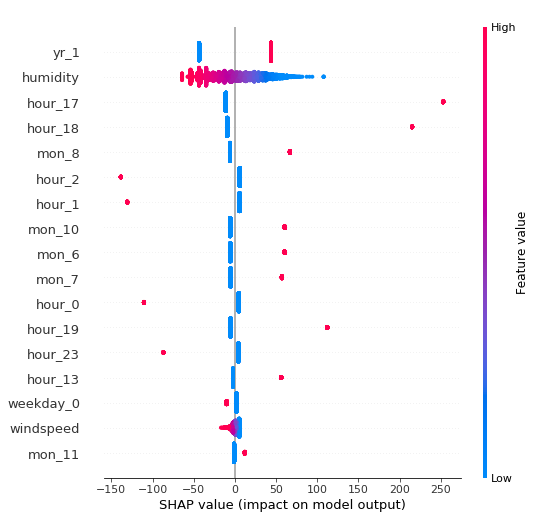

In [67]:
shap.summary_plot(shap_values, x_test_array, feature_names=x_test_new.columns)

In [68]:
r2_scores = cross_val_score(linreg, x_train_new, y_train, cv=10)
mse_scores = cross_val_score(linreg, x_train_new, y_train, cv=10,scoring='neg_mean_squared_error')

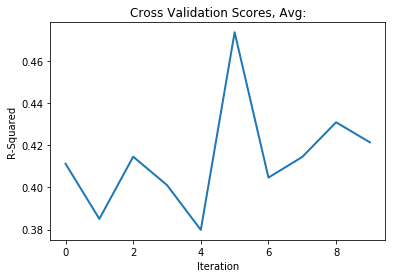

In [69]:
fig, ax = plt.subplots()
ax.plot([i for i in range(len(r2_scores))],r2_scores,lw=2)
ax.set_xlabel('Iteration')
ax.set_ylabel('R-Squared')
ax.title.set_text("Cross Validation Scores, Avg:".format(np.average(r2_scores)))
plt.show()

In [70]:
print("R-squared::{}".format(r2_scores))
print("MSE::{}".format(mse_scores))

R-squared::[0.41126064 0.38508751 0.41459602 0.40113744 0.37986334 0.473637
 0.40468835 0.41448594 0.43092083 0.42141619]
MSE::[-19455.99324486 -19084.39838735 -20312.23757482 -18083.15401054
 -19126.47777437 -18947.59508453 -21084.19044495 -18127.82234415
 -18907.94673986 -18763.17796176]


In [71]:
# Test Set Performance
# Get the predicted values for dependent variable
pred_y = linreg.predict(x_test_new)

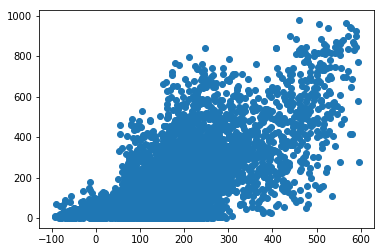

In [72]:
# Correlation between Actual and Preducted for the Test base
plt.scatter(pred_y,y_test)